Here we run teacher-student training with the cifar10 dataset.

The teacher model is the default cifar10_train_test.prototxt model with the layer names adjusted to match up with the teacher-student model. Here are the changes to the solver:

lr policy changed from fixed to step
gamma of 0.1 inserted
stepsize of 20000 inserted
max_iter raised to 100000

The snapshot of the model at iteration 100000 is used for training the ts_cifar10. Its accuracy has plateaud at 80.5%.

For the first ts_training we cut out the traditional softmax loss label and train only using the teacher soft labels.

We put the teacher and student labels through softmax layers, then feed those two into a cross-entropy loss layer.

The teacher-student model was trained for 100000 iterations using a gamma of 0.5 with a stepsize of 10000. The accuracy plateaud at around 67.5% for the last 30,000 iterations.

In [ ]:
# prototxt of the cifar10 teacher-student model

# name: "CIFAR10_full"
# layer {
#   name: "cifar"
#   type: "Data"
#   top: "data"
#   top: "label"
#   include {
#     phase: TRAIN
#   }
#   transform_param {
#     mean_file: "/opt/caffe/examples/cifar10/mean.binaryproto"
#   }
#   data_param {
#     source: "/opt/caffe/examples/cifar10/cifar10_train_lmdb"
#     batch_size: 100
#     backend: LMDB
#   }
# }
# layer {
#   name: "cifar"
#   type: "Data"
#   top: "data"
#   top: "label"
#   include {
#     phase: TEST
#   }
#   transform_param {
#     mean_file: "/opt/caffe/examples/cifar10/mean.binaryproto"
#   }
#   data_param {
#     source: "/opt/caffe/examples/cifar10/cifar10_test_lmdb"
#     batch_size: 100
#     backend: LMDB
#   }
# }
# layer {
#   name: "conv_s_1"
#   type: "Convolution"
#   bottom: "data"
#   top: "conv_s_1"
#   param {
#     lr_mult: 1
#   }
#   param {
#     lr_mult: 2
#   }
#   convolution_param {
#     num_output: 32
#     pad: 2
#     kernel_size: 5
#     stride: 1
#     weight_filler {
#       type: "gaussian"
#       std: 0.0001
#     }
#     bias_filler {
#       type: "constant"
#     }
#   }
# }
# layer {
#   name: "pool_s_1"
#   type: "Pooling"
#   bottom: "conv_s_1"
#   top: "pool_s_1"
#   pooling_param {
#     pool: MAX
#     kernel_size: 3
#     stride: 2
#   }
# }
# layer {
#   name: "relu_s_1"
#   type: "ReLU"
#   bottom: "pool_s_1"
#   top: "pool_s_1"
# }
# layer {
#   name: "norm_s_1"
#   type: "LRN"
#   bottom: "pool_s_1"
#   top: "norm_s_1"
#   lrn_param {
#     local_size: 3
#     alpha: 5e-05
#     beta: 0.75
#     norm_region: WITHIN_CHANNEL
#   }
# }
# layer {
#   name: "conv_s_2"
#   type: "Convolution"
#   bottom: "norm_s_1"
#   top: "conv_s_2"
#   param {
#     lr_mult: 1
#   }
#   param {
#     lr_mult: 2
#   }
#   convolution_param {
#     num_output: 32
#     pad: 2
#     kernel_size: 5
#     stride: 1
#     weight_filler {
#       type: "gaussian"
#       std: 0.01
#     }
#     bias_filler {
#       type: "constant"
#     }
#   }
# }
# layer {
#   name: "relu_s_2"
#   type: "ReLU"
#   bottom: "conv_s_2"
#   top: "conv_s_2"
# }
# layer {
#   name: "pool_s_2"
#   type: "Pooling"
#   bottom: "conv_s_2"
#   top: "pool_s_2"
#   pooling_param {
#     pool: AVE
#     kernel_size: 3
#     stride: 2
#   }
# }
# layer {
#   name: "norm_s_2"
#   type: "LRN"
#   bottom: "pool_s_2"
#   top: "norm_s_2"
#   lrn_param {
#     local_size: 3
#     alpha: 5e-05
#     beta: 0.75
#     norm_region: WITHIN_CHANNEL
#   }
# }
# layer {
#   name: "conv_s_3"
#   type: "Convolution"
#   bottom: "norm_s_2"
#   top: "conv_s_3"
#   param {
#     lr_mult: 1
#   }
#   param {
#     lr_mult: 2
#   }
#   convolution_param {
#     num_output: 64
#     pad: 2
#     kernel_size: 5
#     stride: 1
#     weight_filler {
#       type: "gaussian"
#       std: 0.01
#     }
#     bias_filler {
#       type: "constant"
#     }
#   }
# }
# layer {
#   name: "relu_s_3"
#   type: "ReLU"
#   bottom: "conv_s_3"
#   top: "conv_s_3"
# }
# layer {
#   name: "pool_s_3"
#   type: "Pooling"
#   bottom: "conv_s_3"
#   top: "pool_s_3"
#   pooling_param {
#     pool: AVE
#     kernel_size: 3
#     stride: 2
#   }
# }
# layer {
#   name: "ip_s_1"
#   type: "InnerProduct"
#   bottom: "pool_s_3"
#   top: "ip_s_1"
#   param {
#     lr_mult: 1
#     decay_mult: 250
#   }
#   param {
#     lr_mult: 2
#     decay_mult: 0
#   }
#   inner_product_param {
#     num_output: 10
#     weight_filler {
#       type: "gaussian"
#       std: 0.01
#     }
#     bias_filler {
#       type: "constant"
#     }
#   }
# }
# layer {
#   name: "conv_t_1"
#   type: "Convolution"
#   bottom: "data"
#   top: "conv_t_1"
#   param {
#     lr_mult: 0
#   }
#   param {
#     lr_mult: 0
#   }
#   convolution_param {
#     num_output: 32
#     pad: 2
#     kernel_size: 5
#     stride: 1
#     weight_filler {
#       type: "gaussian"
#       std: 0.0001
#     }
#     bias_filler {
#       type: "constant"
#     }
#   }
# }
# layer {
#   name: "pool_t_1"
#   type: "Pooling"
#   bottom: "conv_t_1"
#   top: "pool_t_1"
#   pooling_param {
#     pool: MAX
#     kernel_size: 3
#     stride: 2
#   }
# }
# layer {
#   name: "relu_t_1"
#   type: "ReLU"
#   bottom: "pool_t_1"
#   top: "pool_t_1"
# }
# layer {
#   name: "norm_t_1"
#   type: "LRN"
#   bottom: "pool_t_1"
#   top: "norm_t_1"
#   lrn_param {
#     local_size: 3
#     alpha: 5e-05
#     beta: 0.75
#     norm_region: WITHIN_CHANNEL
#   }
# }
# layer {
#   name: "conv_t_2"
#   type: "Convolution"
#   bottom: "norm_t_1"
#   top: "conv_t_2"
#   param {
#     lr_mult: 0
#   }
#   param {
#     lr_mult: 0
#   }
#   convolution_param {
#     num_output: 32
#     pad: 2
#     kernel_size: 5
#     stride: 1
#     weight_filler {
#       type: "gaussian"
#       std: 0.01
#     }
#     bias_filler {
#       type: "constant"
#     }
#   }
# }
# layer {
#   name: "relu_t_2"
#   type: "ReLU"
#   bottom: "conv_t_2"
#   top: "conv_t_2"
# }
# layer {
#   name: "pool_t_2"
#   type: "Pooling"
#   bottom: "conv_t_2"
#   top: "pool_t_2"
#   pooling_param {
#     pool: AVE
#     kernel_size: 3
#     stride: 2
#   }
# }
# layer {
#   name: "norm_t_2"
#   type: "LRN"
#   bottom: "pool_t_2"
#   top: "norm_t_2"
#   lrn_param {
#     local_size: 3
#     alpha: 5e-05
#     beta: 0.75
#     norm_region: WITHIN_CHANNEL
#   }
# }
# layer {
#   name: "conv_t_3"
#   type: "Convolution"
#   bottom: "norm_t_2"
#   top: "conv_t_3"
#   param {
#     lr_mult: 0
#   }
#   param {
#     lr_mult: 0
#   }
#   convolution_param {
#     num_output: 64
#     pad: 2
#     kernel_size: 5
#     stride: 1
#     weight_filler {
#       type: "gaussian"
#       std: 0.01
#     }
#     bias_filler {
#       type: "constant"
#     }
#   }
# }
# layer {
#   name: "relu_t_3"
#   type: "ReLU"
#   bottom: "conv_t_3"
#   top: "conv_t_3"
# }
# layer {
#   name: "pool_t_3"
#   type: "Pooling"
#   bottom: "conv_t_3"
#   top: "pool_t_3"
#   pooling_param {
#     pool: AVE
#     kernel_size: 3
#     stride: 2
#   }
# }
# layer {
#   name: "ip_t_1"
#   type: "InnerProduct"
#   bottom: "pool_t_3"
#   top: "ip_t_1"
#   param {
#     lr_mult: 0
#   }
#   param {
#     lr_mult: 0
#   }
#   inner_product_param {
#     num_output: 10
#     weight_filler {
#       type: "gaussian"
#       std: 0.01
#     }
#     bias_filler {
#       type: "constant"
#     }
#   }
# }
# layer {
#   name: "sm_s_1"
#   type: "Softmax"
#   bottom: "ip_s_1"
#   top: "sm_s_1"
# }
# layer {
#   name: "sm_t_1"
#   type: "Softmax"
#   bottom: "ip_t_1"
#   top: "sm_t_1"
# }
# layer {
#   name: "accuracy"
#   type: "Accuracy"
#   bottom: "ip_s_1"
#   bottom: "label"
#   top: "accuracy"
#   include {
#     phase: TEST
#   }
# }
# layer {
#   name: "ts_loss"
#   type: "SigmoidCrossEntropyLoss"
#   bottom: "sm_s_1"
#   bottom: "sm_t_1"
#   top: "ts_loss"
#   loss_weight: 1
# }

For training with both soft and hard labels, we tack on the following layer:

In [ ]:
layer {
    name: "loss"
    type: "SoftmaxWithLoss"
    bottom: "ip_s_1"
    bottom: "label"
    top: "loss"
    loss_weight: 0.5
}

and with the ts_loss_weigh tset to 0.1 and the normal loss weight set to 0.9
Accuracy plateaus at .79, which is very close to the accuracy of the teacher model, and peaks at 0.8 before falling downwards as the model overfits the teacher model (teacher model loss starts dropping, normal label loss holds constant, accuracy goes down) with an accuracy of .799 on iteration 100000 dropping to .798 by iteration 126000

Teacher-student training appears to have no benefit over normal training for the built-in CIFAR10 dataset using reLUs, which converges faster on its own than with the teacher-student labels.

Teacher-student training with a student model using sigmoid activations instead of reLUs is completely stuck.

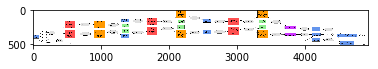

In [5]:
import matplotlib.pyplot as plt
im = plt.imread('ts_cifar10_graph.png')
plt.imshow(im)
plt.show()